In [48]:
import pandas as pd
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.interpolate import make_interp_spline

In [50]:
zip_path = r"D:\桌面\ml-100k.zip"
extract_folder = r"D:\桌面\ml-100k"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

ratings_file = os.path.join(extract_folder, 'ml-100k', 'u.data')
columns = ['user_id', 'item_id', 'rating', 'timestamp']

ratings = pd.read_csv(ratings_file, sep='\t', header=None, names=columns)

print("Initial Ratings Data (First 5 rows):")
print(ratings.head())  

Initial Ratings Data (First 5 rows):
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [51]:
utility_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')

print("\nUtility Matrix (User-Item Rating Matrix):")
print(utility_matrix.head()) 



Utility Matrix (User-Item Rating Matrix):
item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5   

In [53]:
user_means = utility_matrix.mean(axis=1)
user_centered = utility_matrix.subtract(user_means, axis=0)

print("\nCentered User Ratings (After subtracting mean ratings per user):")
print(user_centered.head())  


Centered User Ratings (After subtracting mean ratings per user):
item_id      1         2         3         4         5         6         7     \
user_id                                                                         
1        1.389706 -0.610294  0.389706 -0.610294 -0.610294  1.389706  0.389706   
2        0.290323       NaN       NaN       NaN       NaN       NaN       NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        1.125714  0.125714       NaN       NaN       NaN       NaN       NaN   

item_id      8         9         10    ...  1673  1674  1675  1676  1677  \
user_id                                ...                                 
1       -2.610294  1.389706 -0.610294  ...   NaN   NaN   NaN   NaN   NaN   
2             NaN       NaN -1.709677  ...   NaN   NaN   NaN   NaN   NaN   
3             NaN       NaN       NaN  ...   NaN   NaN   NaN  

In [55]:
user_centered_filled = user_centered.fillna(0)

cos_sim_matrix = cosine_similarity(user_centered_filled)

print("\nCosine Similarity Matrix (User-User Similarity):")
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=utility_matrix.index, columns=utility_matrix.index)
print(cos_sim_df.head())



Cosine Similarity Matrix (User-User Similarity):
user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.043411  0.011051  0.059303  0.134514  0.103373  0.110556   
2        0.043411  1.000000  0.013658 -0.017016  0.035770  0.094503  0.089408   
3        0.011051  0.013658  1.000000 -0.059638  0.016037 -0.017158  0.016141   
4        0.059303 -0.017016 -0.059638  1.000000  0.007373 -0.053929 -0.025604   
5        0.134514  0.035770  0.016037  0.007373  1.000000  0.038484  0.067874   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.180891  0.012253 -0.000621  ...  0.025835 -0.047952  0.087224   
2        0.055640  0.027294  0.097846  ...  0.012853 -0.028798  0.056659   
3        0.041177 -0.010093  0.023856  ...  0.001615  0.000658 -0.006888   
4 

In [57]:
similar_users = cos_sim_df[1].sort_values(ascending=False)[1:11]
print("\nTop 10 Most Similar Users to User 1:")
print(similar_users) 



Top 10 Most Similar Users to User 1:
user_id
773    0.204792
868    0.202321
592    0.196592
880    0.195801
429    0.190661
276    0.187476
916    0.186358
222    0.182415
457    0.182253
8      0.180891
Name: 1, dtype: float64


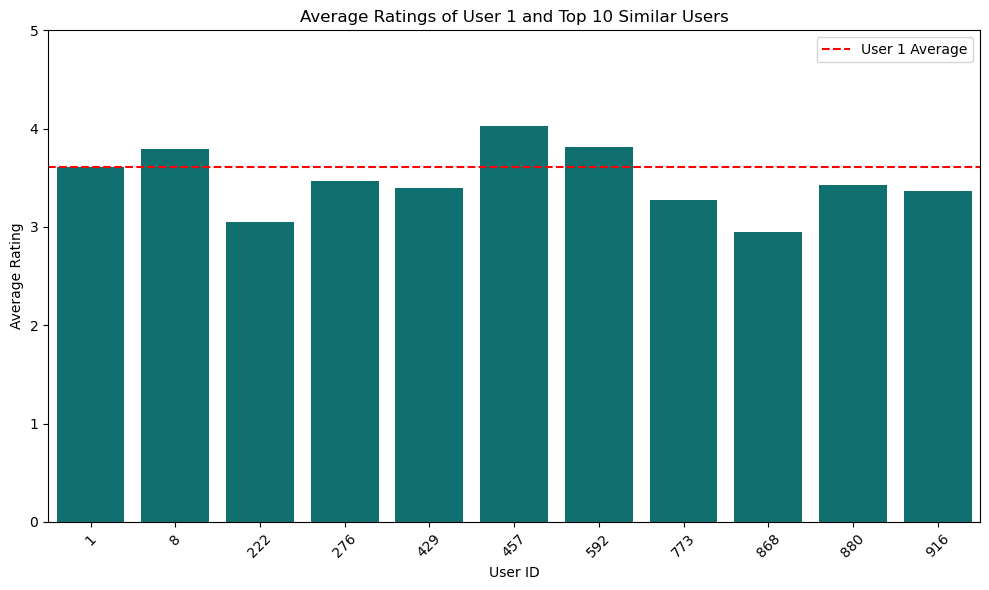

In [70]:
avg_ratings = utility_matrix.loc[[1] + similar_users.index.tolist()].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, color='teal')
plt.title('Average Ratings of User 1 and Top 10 Similar Users')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Ratings are between 1 and 5
plt.xticks(rotation=45)
plt.axhline(y=avg_ratings[1], color='red', linestyle='--', label='User 1 Average')
plt.legend()
plt.tight_layout()
plt.savefig(r"D:/桌面/数据挖掘/Average Ratings of User 1 and Top 10 Similar Users.png")
plt.show()

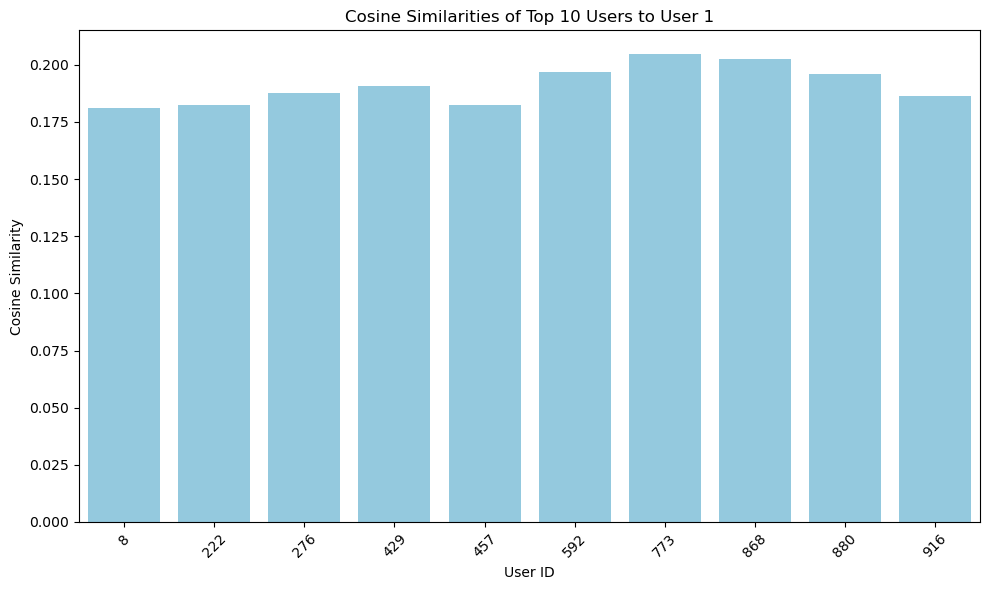

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=similar_users.index, y=similar_users.values, color='skyblue')
plt.title('Cosine Similarities of Top 10 Users to User 1')
plt.xlabel('User ID')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"D:/桌面/数据挖掘/Cosine Similarities of Top 10 Users to User 1.png")
plt.show()

In [ ]:
similar_users_ratings = utility_matrix.loc[similar_users.index, 508]
print("\nSimilar Users' Ratings for Item 508:")
print(similar_users_ratings) 


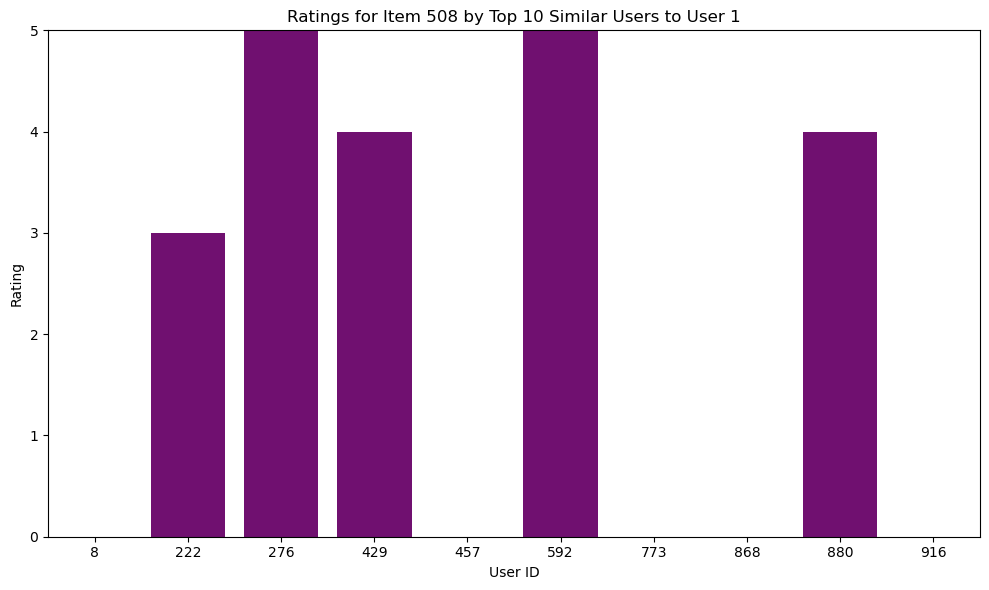

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=similar_users_ratings.index, y=similar_users_ratings.values, color='purple')
plt.title('Ratings for Item 508 by Top 10 Similar Users to User 1')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.ylim(0, 5)  # Ratings are between 1 and 5
plt.tight_layout()
plt.savefig(r"D:/桌面/数据挖掘/Ratings for Item 508 by Top 10 Similar Users to User 1.png")
plt.show()

In [22]:
expected_rating = similar_users_ratings.mean()
print("\nExpected Rating for Item 508 for User 1:")
print(expected_rating)  



Expected Rating for Item 508 for User 1:
4.2
